In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier


In [2]:
mnist = fetch_mldata("MNIST original")

In [3]:
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [7]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(200,), activation = 'tanh', max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)

Iteration 1, loss = 0.30554689
Iteration 2, loss = 0.14803281
Iteration 3, loss = 0.10248745
Iteration 4, loss = 0.07794654
Iteration 5, loss = 0.06187980
Iteration 6, loss = 0.04997098
Iteration 7, loss = 0.04089912
Iteration 8, loss = 0.03337440
Iteration 9, loss = 0.02796244
Iteration 10, loss = 0.02284392


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.996667
Test set score: 0.980000


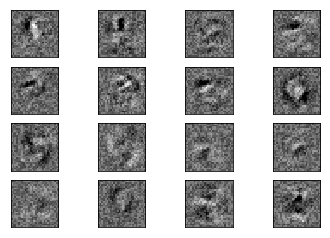

In [5]:
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [6]:
y_pred = mlp.predict(X_test)
from sklearn.metrics import classification_report
print("Detailed classification report:")
print(classification_report(y_test, y_pred))

Detailed classification report:
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98       980
        1.0       0.99      0.99      0.99      1135
        2.0       0.99      0.97      0.98      1032
        3.0       0.98      0.98      0.98      1010
        4.0       0.98      0.98      0.98       982
        5.0       0.98      0.97      0.98       892
        6.0       0.98      0.98      0.98       958
        7.0       0.98      0.97      0.98      1028
        8.0       0.97      0.98      0.97       974
        9.0       0.97      0.98      0.97      1009

avg / total       0.98      0.98      0.98     10000

